In [1]:
import pandas as pd
import numpy as np

In [2]:
baseData = pd.read_csv("./dataset/국가건강검진_혈압혈당_데이터.csv")
baseData

,SEX,BTH_G,SBP,DBP,FBS,DIS,BMI
0,1,1,116,78,94,4,16.6
1,1,1,100,60,79,4,22.3
2,1,1,100,60,87,4,21.9
3,1,1,111,70,72,4,20.2
4,1,1,120,80,98,4,20.0
...,...,...,...,...,...,...,...
999995,2,27,120,70,81,2,23.1
999996,2,27,110,70,104,2,27.2
999997,2,27,115,53,110,1,25.2
999998,2,27,120,70,90,2,19.7


In [3]:
baseData.dtypes

SEX        int64
BTH_G      int64
SBP        int64
DBP        int64
FBS        int64
DIS        int64
BMI      float64
dtype: object

In [4]:
baseData.isnull().sum()

SEX      0
BTH_G    0
SBP      0
DBP      0
FBS      0
DIS      0
BMI      0
dtype: int64

In [5]:
baseData.describe()

,SEX,BTH_G,SBP,DBP,FBS,DIS,BMI
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,1.489773,13.905268,121.871763,75.787874,98.864428,3.471040,23.804029
std,0.499896,7.006442,14.561706,9.793411,22.981300,0.946151,3.297287
min,1.000000,1.000000,82.000000,50.000000,60.000000,1.000000,14.800000
25%,1.000000,9.000000,110.000000,70.000000,87.000000,3.000000,21.500000
50%,1.000000,14.000000,120.000000,76.000000,94.000000,4.000000,23.600000
75%,2.000000,19.000000,130.000000,80.000000,104.000000,4.000000,25.800000
max,2.000000,27.000000,190.000000,120.000000,358.000000,4.000000,40.300000


In [6]:
import matplotlib.pyplot as plt

In [7]:
baseData

,SEX,BTH_G,SBP,DBP,FBS,DIS,BMI
0,1,1,116,78,94,4,16.6
1,1,1,100,60,79,4,22.3
2,1,1,100,60,87,4,21.9
3,1,1,111,70,72,4,20.2
4,1,1,120,80,98,4,20.0
...,...,...,...,...,...,...,...
999995,2,27,120,70,81,2,23.1
999996,2,27,110,70,104,2,27.2
999997,2,27,115,53,110,1,25.2
999998,2,27,120,70,90,2,19.7


In [8]:
baseData.dtypes

SEX        int64
BTH_G      int64
SBP        int64
DBP        int64
FBS        int64
DIS        int64
BMI      float64
dtype: object

In [9]:
baseData.corr()

,SEX,BTH_G,SBP,DBP,FBS,DIS,BMI
SEX,1.000000,0.085226,-0.168796,-0.190420,-0.101150,-0.004797,-0.170833
BTH_G,0.085226,1.000000,0.275981,0.134484,0.213951,-0.478049,0.088089
SBP,-0.168796,0.275981,1.000000,0.743006,0.186501,-0.310757,0.304383
DBP,-0.190420,0.134484,0.743006,1.000000,0.138717,-0.193525,0.275492
FBS,-0.101150,0.213951,0.186501,0.138717,1.000000,-0.315935,0.173688
DIS,-0.004797,-0.478049,-0.310757,-0.193525,-0.315935,1.000000,-0.200107
BMI,-0.170833,0.088089,0.304383,0.275492,0.173688,-0.200107,1.000000


In [10]:
corrDf = baseData.corr()
stdCorr = 0.3
dataCol = list(corrDf.loc[(abs(corrDf["DIS"])>stdCorr)&(corrDf["DIS"]!=1)].index)
dataCol

['BTH_G', 'SBP', 'FBS']

In [11]:
dataCol = dataCol[-2:]
dataCol

['SBP', 'FBS']

In [12]:
tarCol = ['DIS']

In [13]:
featureData = baseData[dataCol]
labelData = baseData[tarCol]

In [14]:
# 분류모델

In [34]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [16]:
train_feat,\
test_feat, \
train_label, \
test_label = train_test_split(featureData, labelData, test_size=0.2, random_state=10)

In [17]:
print(train_feat.shape)
print(train_label.shape)
print(test_feat.shape)
print(test_label.shape)

(800000, 2)
(800000, 1)
(200000, 2)
(200000, 1)


In [18]:
model_method = DecisionTreeClassifier(random_state=10, max_depth=3)

In [19]:
model = model_method.fit(X = train_feat, y = train_label)

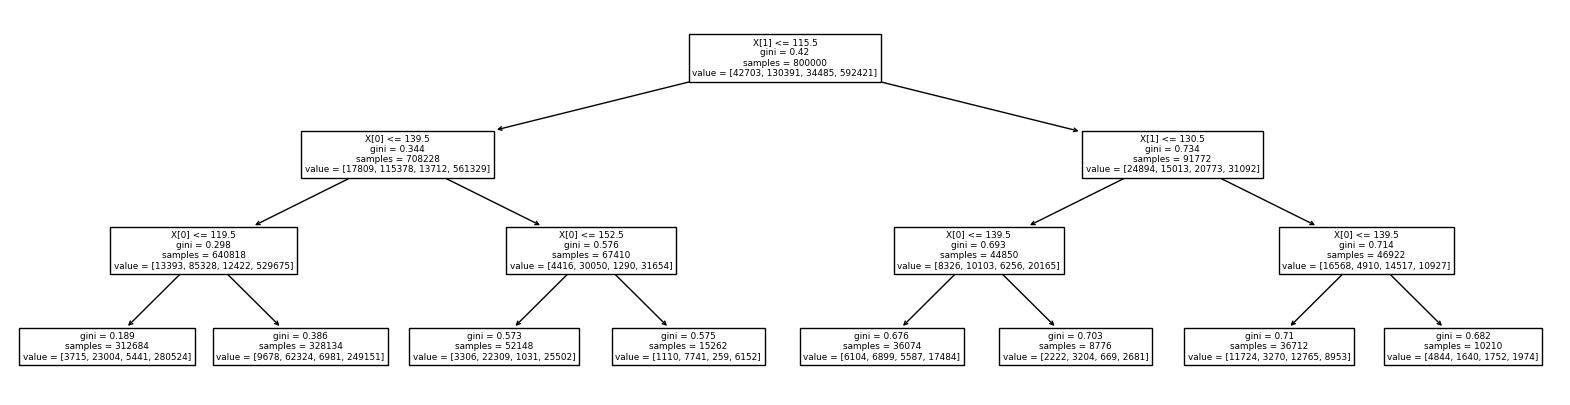

In [36]:
plt.figure(figsize=(20,5))
plot_tree(model)
plt.show()

In [20]:
predict = model.predict(test_feat)

In [21]:
predictData = pd.DataFrame(predict, columns = ["predict"])

In [22]:
test_label.reset_index(drop=True, inplace=True)

In [23]:
finalReuslt = pd.concat( [test_label, predictData], axis=1)

In [24]:
# 결과 테스트하기 
ac_score = accuracy_score(finalReuslt.DIS, 
                          finalReuslt.predict)
cl_report = classification_report(finalReuslt.DIS, 
                                  finalReuslt.predict)
## 결과 리포트하기
print("Accuracy =", ac_score)
print("result =\n", cl_report)

Accuracy = 0.75309
result =
               precision    recall  f1-score   support

           1       0.49      0.12      0.19     10695
           2       0.45      0.08      0.14     32435
           3       0.35      0.37      0.36      8629
           4       0.79      0.97      0.87    148241

    accuracy                           0.75    200000
   macro avg       0.52      0.38      0.39    200000
weighted avg       0.70      0.75      0.69    200000



In [25]:
#모델 테스트

In [26]:
list(train_feat)

['SBP', 'FBS']

In [27]:
SBP = 130 #최고혈압
FBS = 150 #공복혈당

In [28]:
myData = pd.DataFrame([[SBP,FBS]])
myData

,0,1
0,130,150


In [29]:
result = model.predict(myData)
re = pd.DataFrame({"result": result})
re

C:\Users\caose\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


,result
0,3


In [30]:
re.result[0]

3

In [31]:
def result(result):
    if result == 1 :
        print("고혈압" + " + " + "당뇨")
    elif result == 2 :
        print("고혈압")
    elif result == 3 :
        print("당뇨")
    else :
        print("건강")

In [32]:
result(re.result[0])

당뇨
